In [96]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


In [97]:
# Importing dataset
Leads = pd.read_csv("Leads.csv")


### Data cleaning and preparation

In [98]:
#Inspecting data

Leads.shape

(9240, 37)

In [99]:
Leads.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [100]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [101]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Cleaning data

In [102]:


#Check for null% and dropping columns with null % > 35%

col_g35 = Leads.columns[round(100*(Leads.isnull().sum()/len(Leads)))>=35]

Leads=Leads.drop(col_g35,1)

#Check for null% after dropping
round(100*(Leads.isnull().sum()/len(Leads)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [103]:
#Dropping unwanted columns
Leads.drop(['City','Country','How did you hear about X Education','Lead Profile','Prospect ID', 'Lead Number'], axis = 1, inplace = True)

Leads.shape

(9240, 25)

In [104]:
#Check the null% in all columns
Leads.isnull().sum()*100/len(Leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [105]:
#Working on Specialization
Leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [106]:
# Making Nan  and Select as not selected, as it can be students or their specialisation is not available in list
Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'NotSelected')
Leads['Specialization'] = Leads['Specialization'].replace('Select', 'NotSelected')
Leads['Specialization'].value_counts(dropna=False)

NotSelected                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [107]:
#Working on ""What is your current occupation""
Leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [108]:
# Making Nan as Unemployed, as it can be students
Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan, 'Unemployed')
Leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [109]:
#Working on What matters most to you in choosing a course 
Leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [110]:
# Making Nan as Better Career Prospects
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
Leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [111]:
# Drop columns which contains only conatins mostly one type of values for all datapoints
Leads.drop(['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [112]:
Leads.shape

(9240, 12)

In [113]:
# Check again the Null value percentage in dataframe
Leads.isnull().sum()*100/len(Leads)

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

### Visualize data

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#getting a list of categorical columns

cat_cols= Leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

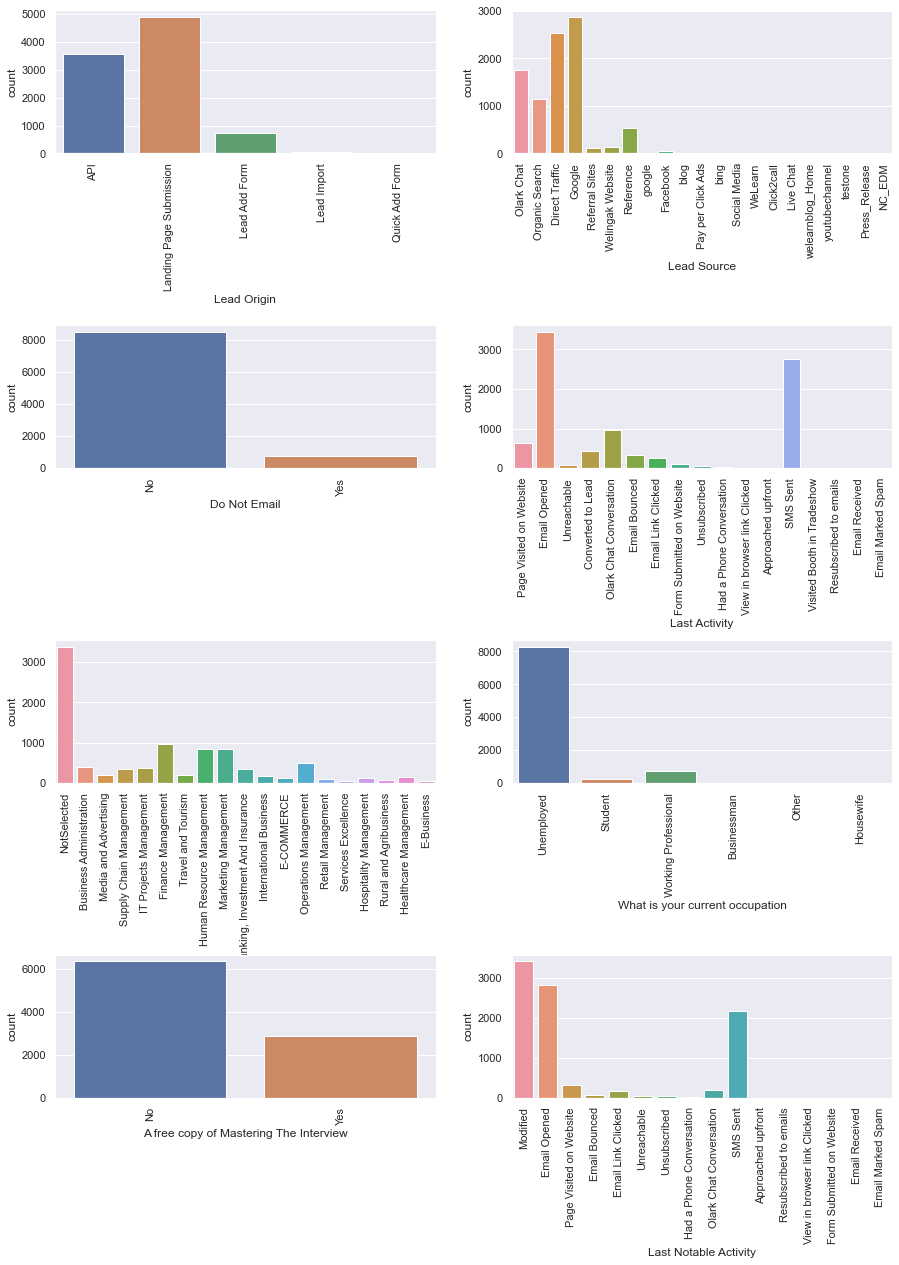

In [116]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=Leads)
    plt.xticks(rotation=90)
plt.show()

In [117]:
#Updatng Lead source

# Need to replace 'google' with 'Google'
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'], 'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

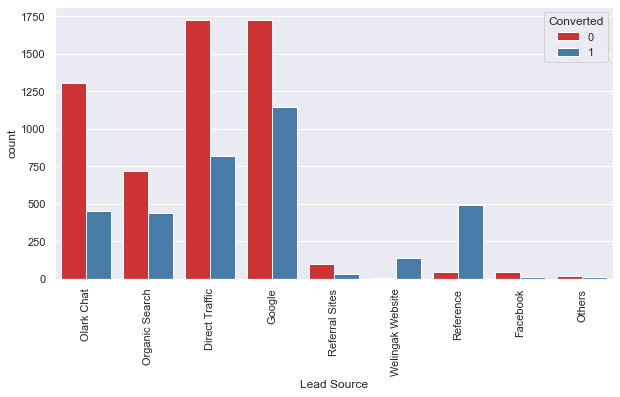

In [118]:
#Visualizing Leadsource

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads,palette='Set1')
plt.xticks(rotation = 90)

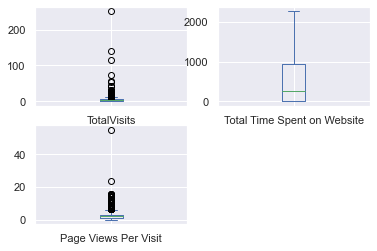

In [119]:
# Check for Outliers in Numeric variables
#plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
Leads.TotalVisits.plot.box()
plt.subplot(2,2,2)
Leads['Total Time Spent on Website'].plot.box()
plt.subplot(2,2,3)
Leads['Page Views Per Visit'].plot.box()
plt.show()

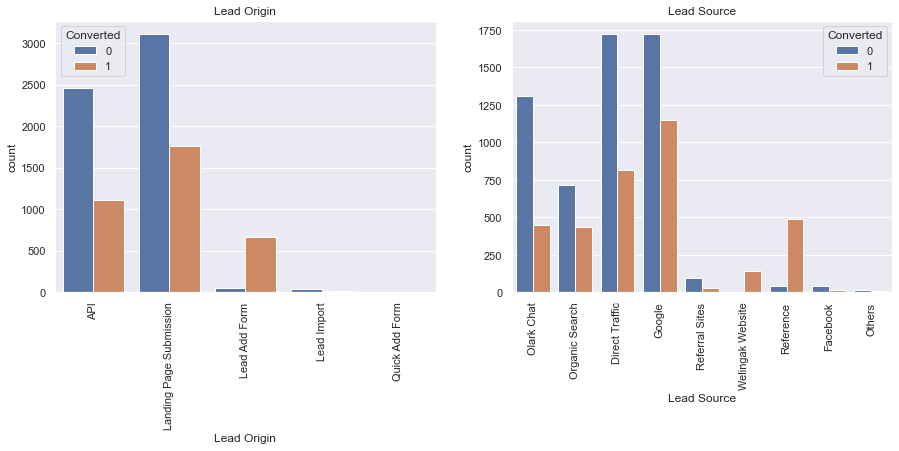

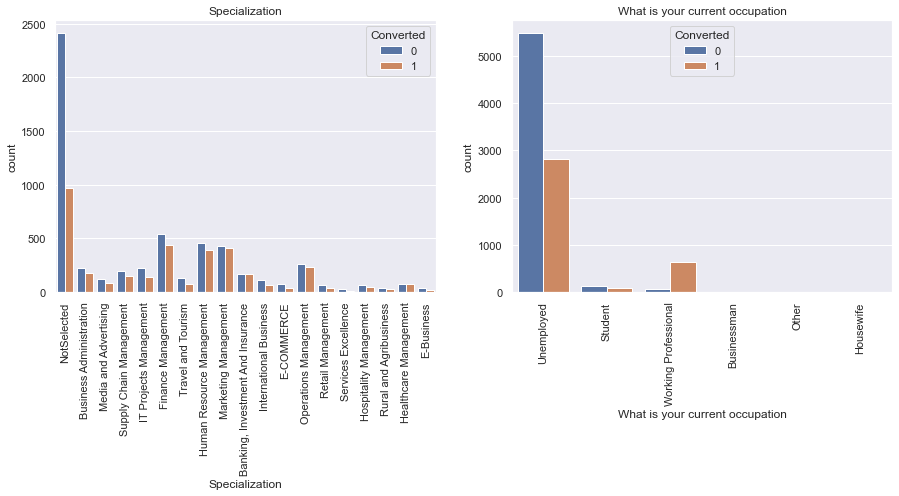

In [120]:
# Converted V/S Lead Origin,  Lead Source,  Specialization and What is your current occupation
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

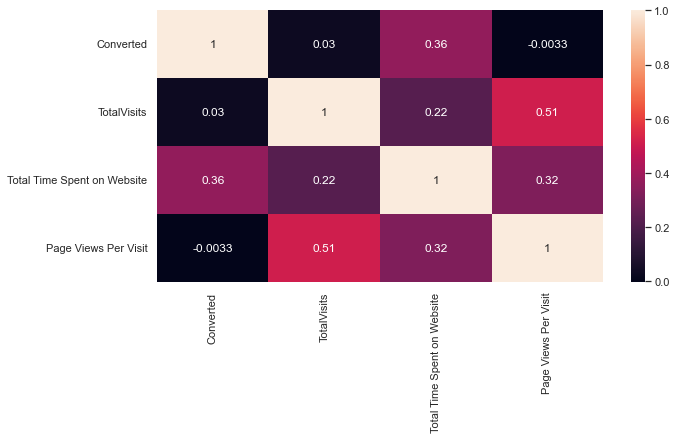

In [121]:
# Check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Leads.corr(),annot=True)
plt.show()

In [123]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Leads_dum = pd.concat([Leads, dummy], axis=1)
Leads_dum.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NotSelected,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NotSelected,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NotSelected,Unemployed,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split

In [85]:
# Import the required library
from sklearn.model_selection import train_test_split

In [86]:
X = Leads_dum.drop(['Converted'], 1)
X.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0.0,0,0.0,Page Visited on Website,NotSelected,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,5.0,674,2.5,Email Opened,NotSelected,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,2.0,1428,1.0,Converted to Lead,NotSelected,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
